In [8]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import cv2

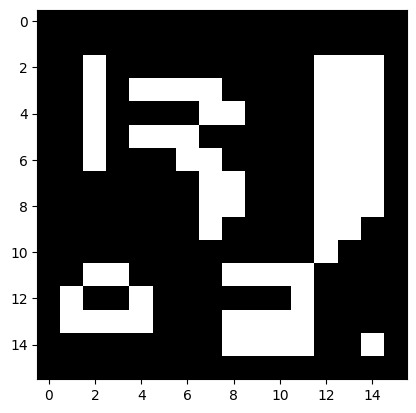

In [7]:
Image1 = scipy.io.loadmat('Image1.mat')["Image1"]
plt.imshow(Image1, cmap='gray')

# 1

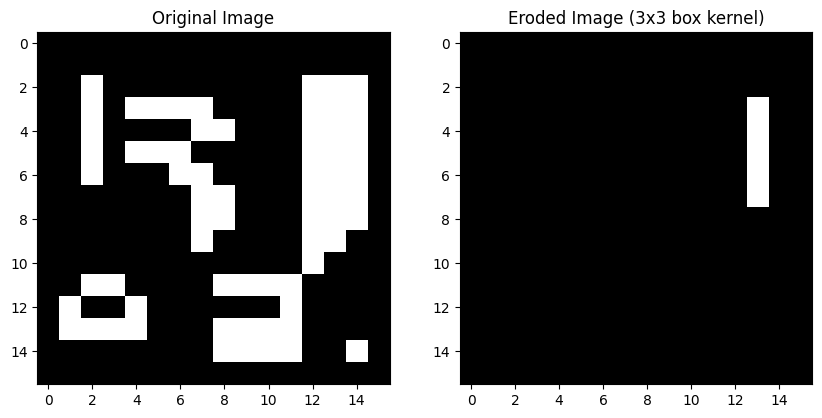

In [25]:
box_kernel = np.ones((3, 3), np.uint8)
eroded_box = cv2.erode(Image1, box_kernel, iterations=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Eroded Image (3x3 box kernel)")
plt.imshow(eroded_box, cmap='gray')
plt.show()

# 2

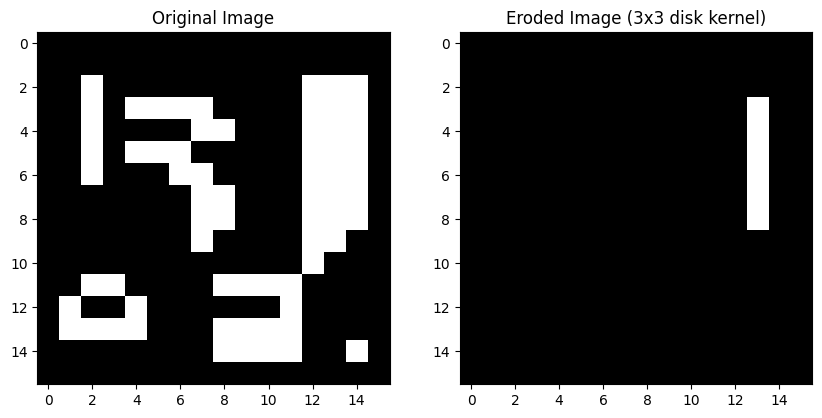

In [26]:
disk_kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], np.uint8)
eroded_disk = cv2.erode(Image1, disk_kernel, iterations=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Eroded Image (3x3 disk kernel)")
plt.imshow(eroded_disk, cmap='gray')
plt.show()

# 4

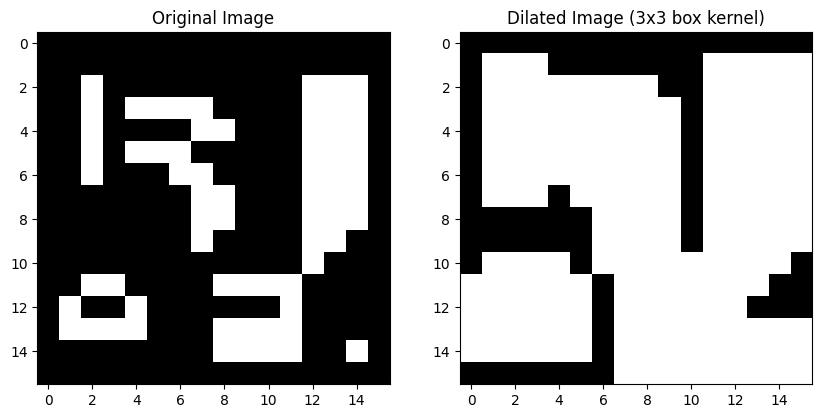

In [27]:
dilated_box = cv2.dilate(Image1, box_kernel, iterations=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Dilated Image (3x3 box kernel)")
plt.imshow(dilated_box, cmap='gray')
plt.show()

# 5

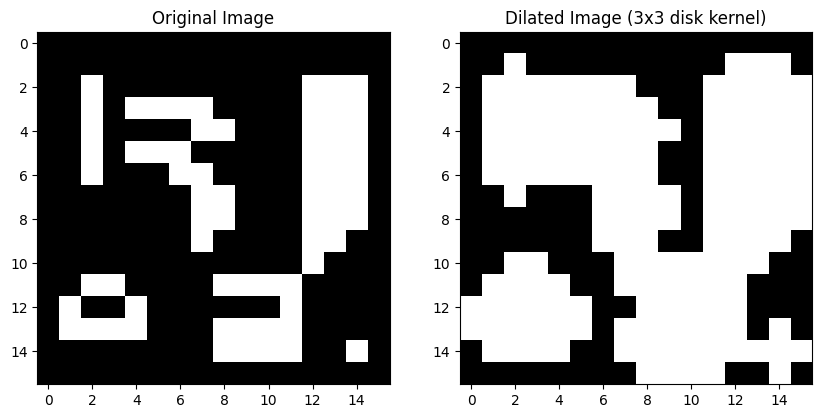

In [28]:
dilated_disk = cv2.dilate(Image1, disk_kernel, iterations=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Dilated Image (3x3 disk kernel)")
plt.imshow(dilated_disk, cmap='gray')
plt.show()

# 7 

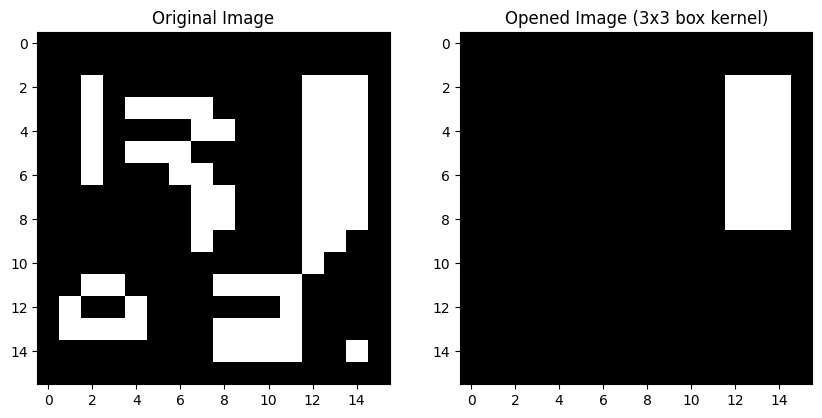

In [29]:
opening_image = cv2.morphologyEx(Image1, cv2.MORPH_OPEN, box_kernel) # Erosion followed by Dilation

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Opened Image (3x3 box kernel)")
plt.imshow(opening_image, cmap='gray')
plt.show()

# 9

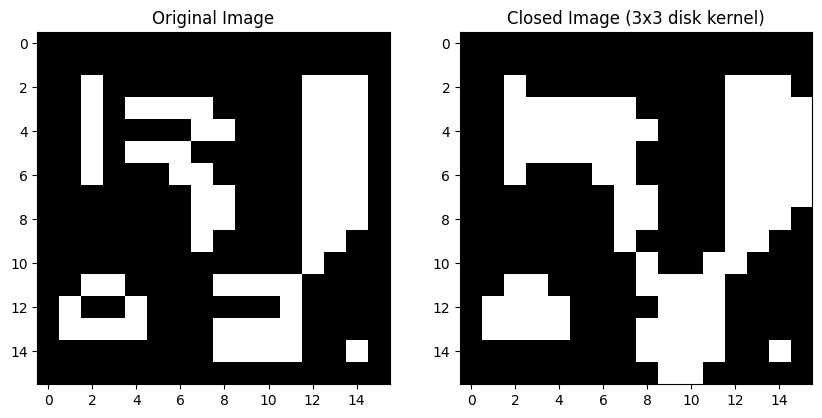

In [33]:
closing_image = cv2.morphologyEx(Image1, cv2.MORPH_CLOSE, disk_kernel) # Dilation followed by Erosion

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Closed Image (3x3 disk kernel)")
plt.imshow(closing_image, cmap='gray')
plt.show()

## 11

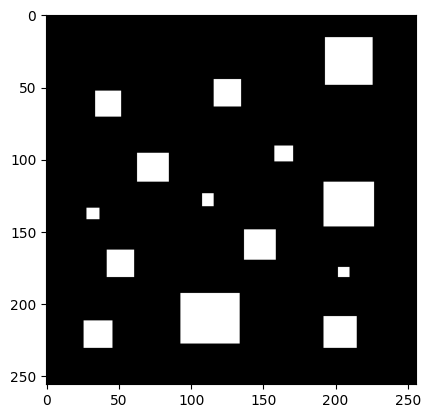

In [36]:
rects = scipy.io.loadmat('rects.mat')["rects"]
plt.imshow(rects, cmap='gray')

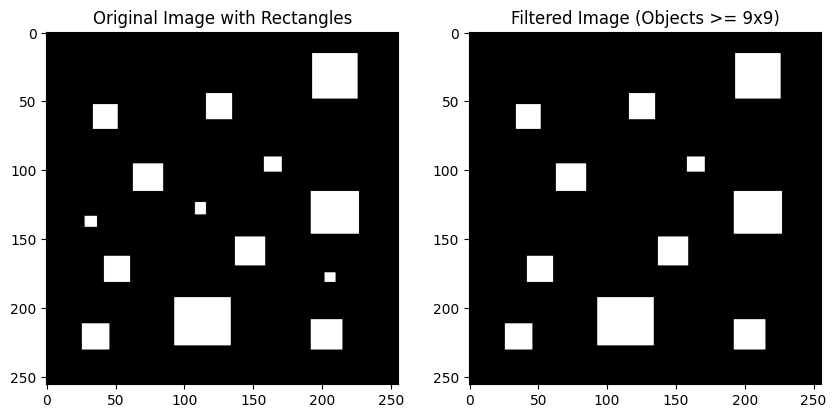

In [38]:
# Define the minimum size threshold (in pixels) for components (9x9 = 81 pixels)
min_size = 81
# Connected component analysis to label the image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(rects, connectivity=8)
# Create an output image to store the result
output_image = np.zeros_like(rects)
# Filter out components smaller than 9x9 (i.e., area < 81 pixels)
for i in range(1, num_labels):  # Start from 1 to skip the background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        output_image[labels == i] = 255  # Keep this component in the output image
# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image with Rectangles")
plt.imshow(rects, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Filtered Image (Objects >= 9x9)")
plt.imshow(output_image, cmap='gray')
plt.show()

# 12

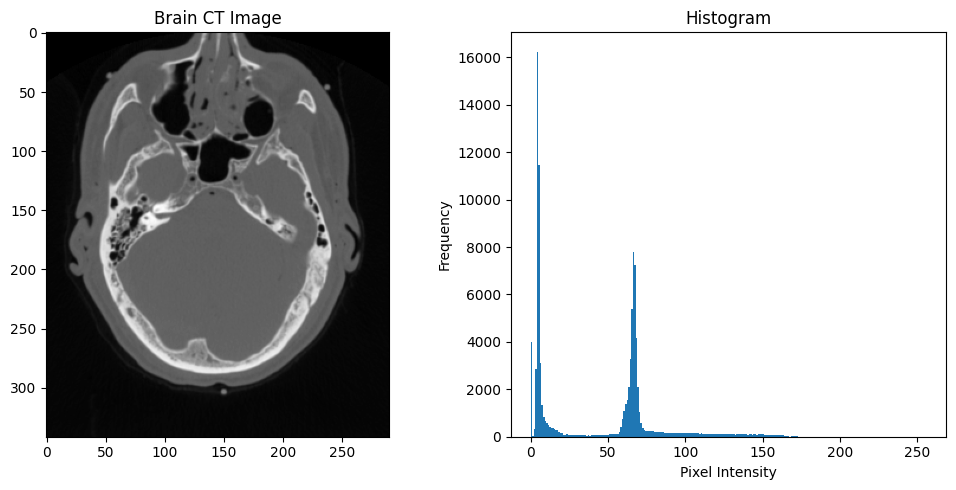

In [45]:
brain = cv2.imread("BrainCT.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Brain CT Image")
plt.imshow(brain, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.hist(brain.ravel(), bins=256, range=[0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

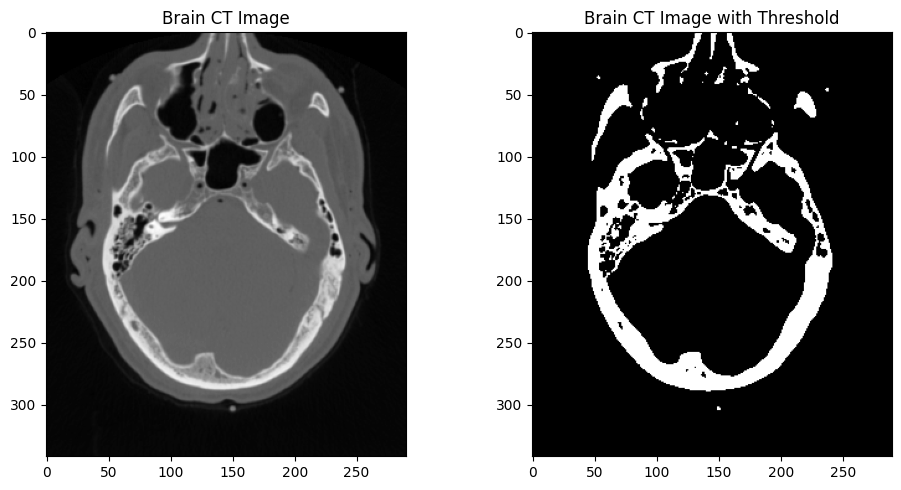

In [63]:
threshold = 75
brain_threshold = np.where(brain > threshold, 1, 0)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Brain CT Image")
plt.imshow(brain, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Brain CT Image with Threshold")
plt.imshow(brain_threshold, cmap='gray')
plt.tight_layout()
plt.show()

# 13

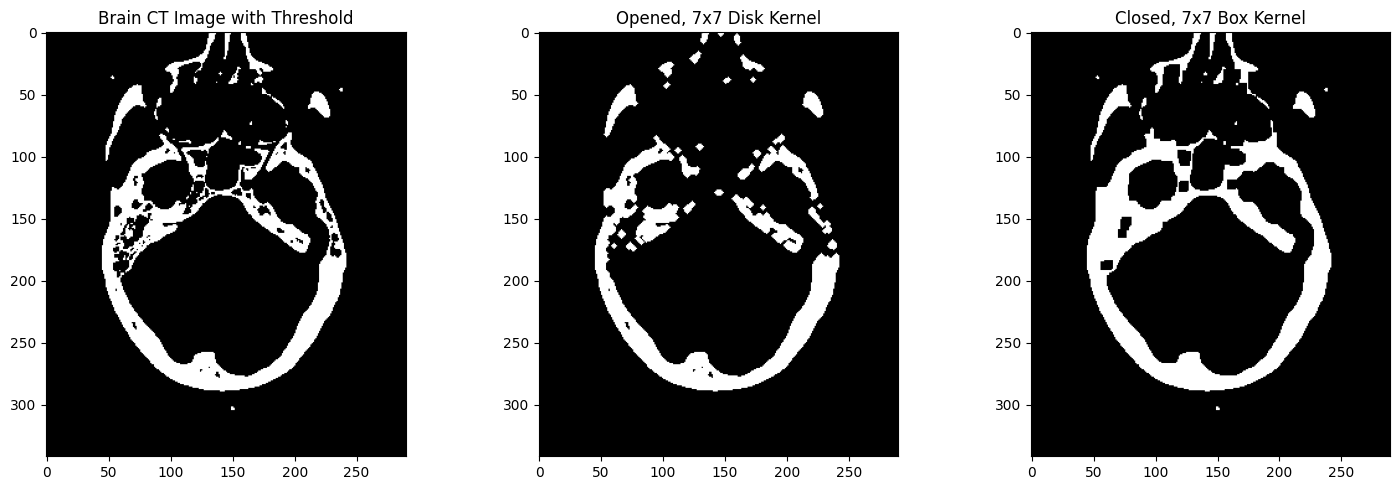

In [85]:
brain_threshold = brain_threshold.astype(dtype=np.uint8)
box_kernel = np.ones((7, 7), np.uint8)
disk_kernel = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
], np.uint8)
brain_open = cv2.morphologyEx(brain_threshold, cv2.MORPH_OPEN, disk_kernel) # Erosion followed by Dilation
brain_close = cv2.morphologyEx(brain_threshold, cv2.MORPH_CLOSE, box_kernel) # Dilation followed by Erosion

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Brain CT Image with Threshold")
plt.imshow(brain_threshold, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Opened, 7x7 Disk Kernel")
plt.imshow(brain_open, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Closed, 7x7 Box Kernel")
plt.imshow(brain_close, cmap='gray')
plt.tight_layout()
plt.show()


In [88]:
imask = brain_close.copy()

# 14

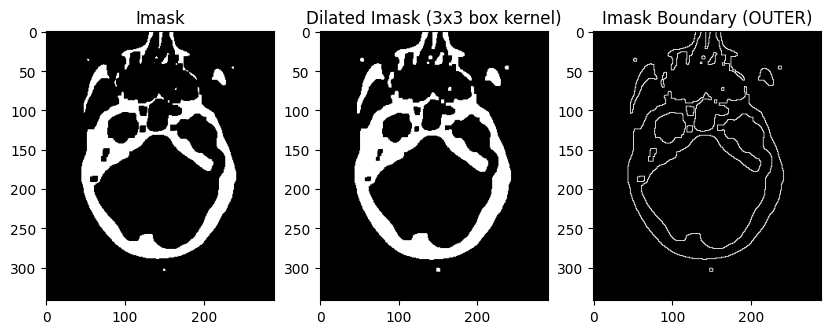

In [94]:
box_kernel = np.ones((3, 3), np.uint8)
dilated_imask = cv2.dilate(imask, box_kernel, iterations=1)
imask_boundary_dilation = imask - dilated_imask
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Imask")
plt.imshow(imask, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Dilated Imask (3x3 box kernel)")
plt.imshow(dilated_imask, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Imask Boundary (OUTER)")
plt.imshow(imask_boundary_dilation, cmap='gray')
plt.show()

# 15

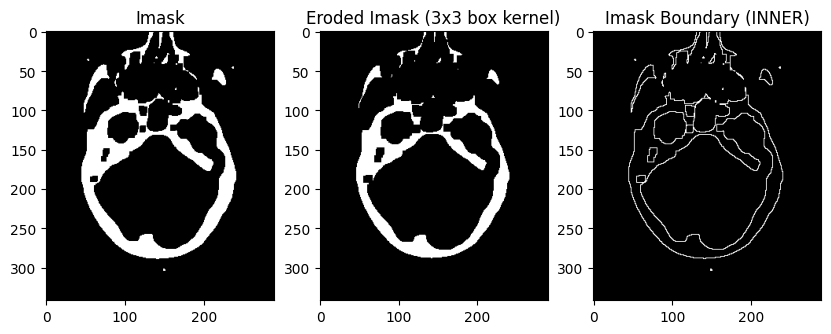

In [96]:
box_kernel = np.ones((3, 3), np.uint8)
eroded_imask = cv2.erode(imask, box_kernel, iterations=1)
imask_boundary_erosion = imask - eroded_imask
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Imask")
plt.imshow(imask, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Eroded Imask (3x3 box kernel)")
plt.imshow(eroded_imask, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Imask Boundary (INNER)")
plt.imshow(imask_boundary_erosion, cmap='gray')
plt.show()